<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week9_TugasKelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# @title mount to drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
# @title import library

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

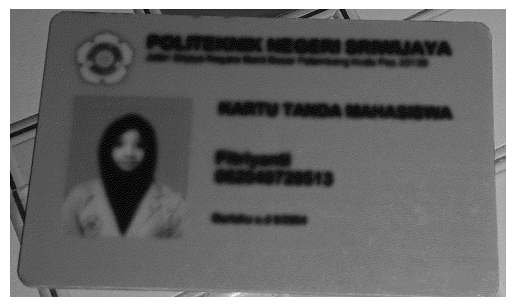

In [34]:
# @title load and crop image

image = cv.imread('/content/drive/MyDrive/pcvk/4/3I_2341729016_3 - Fitri yanti.jpg', cv.IMREAD_GRAYSCALE)
image = image[390:1260, 540:2040]
height, width = image.shape

# Floyd-Steinberg dithering
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = image[y, x]
        new_pixel = 255 * (old_pixel // 128)  # Quantize to 0 or 255
        image[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribute the error
        image[y, x + 1] = np.clip(image[y, x + 1] + error * 7 / 16, 0, 255)
        image[y + 1, x - 1] = np.clip(image[y + 1, x - 1] + error * 3 / 16, 0, 255)
        image[y + 1, x] = np.clip(image[y + 1, x] + error * 5 / 16, 0, 255)
        image[y + 1, x + 1] = np.clip(image[y + 1, x + 1] + error * 1 / 16, 0, 255)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

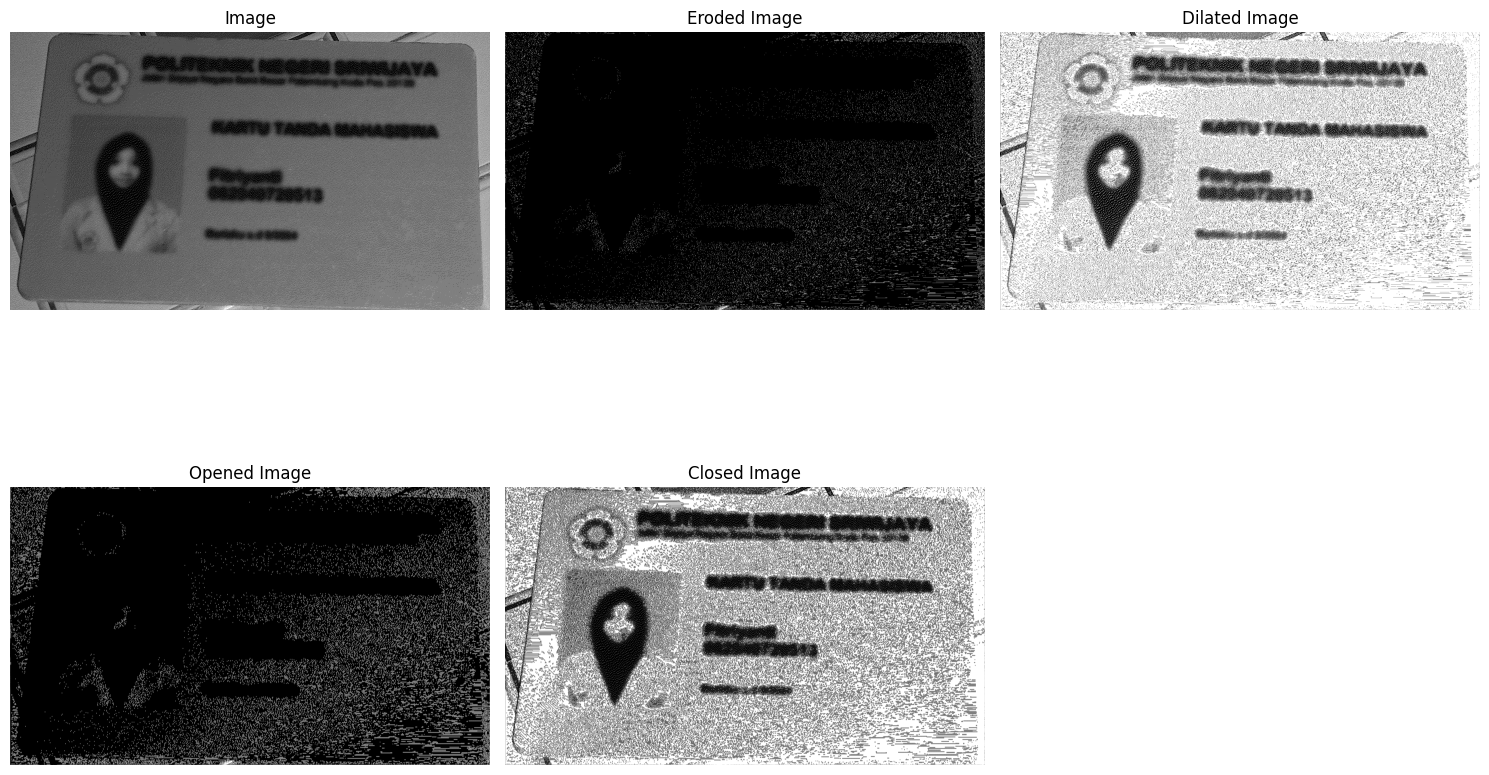

In [41]:
eroded_image = cv.erode(image, cv.getStructuringElement(cv.MORPH_RECT, (1, 3)))
dilated_image = cv.dilate(image, cv.getStructuringElement(cv.MORPH_RECT, (1, 3)))
opened_image = cv.morphologyEx(image, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT, (1, 3)))
closed_image = cv.morphologyEx(image, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT, (1, 3)))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.tight_layout()
plt.show()